# Supplementary Figure 2

In [1]:
import os.path as op
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import plotutils

In [2]:
df_dir = op.join('..', 'data', 'dataframes')

In [3]:
subjects, rois, tasks = plotutils.default_data()

In [4]:
plotutils.set_plot_style()

### Load dataframes

In [5]:
subj_data = pd.read_csv(op.join(df_dir, 'subj_ang_data.csv'))
subj_params = pd.read_csv(op.join(df_dir, 'subj_ang_fits.csv'))

### Supplementary Figure 2a

In [6]:
pal = ['#d95f02', '#e6a778']
pal_dict = dict(zip(tasks, pal))
z = dict(zip(tasks, [0, 10]))

In [7]:
theta = np.linspace(-np.pi, np.pi, 361) 

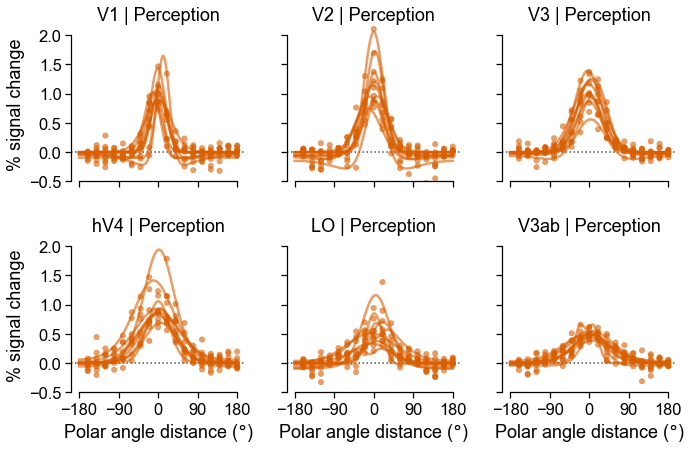

In [8]:
## Plot bold response by angular distance bin 
g = sns.relplot(x='ang_dist_bin', y='beta_adj', col='roi', col_order=rois, 
                hue='subj', palette=[pal_dict['perception']]*len(subjects), 
                kind='scatter', col_wrap=3, s=30, alpha=.6, edgecolor=None, 
                legend=False, height=3.3, aspect=1, 
                data=subj_data.query("task=='perception'"))


# Plot the fit von mises distributions for each roi and subject
per_params = subj_params.query("task=='perception'")
for (r, s) in itertools.product(g.col_names, subjects):
    ax_i = rois.index(r)
    p = per_params.query("roi==@r & subj==@s")[['loc', 'kappa1', 'scale1', 'kappa2', 'scale2']].iloc[0]
    yhat = plotutils.diff_vonmises(theta, *p)
    g.axes.flatten()[ax_i].plot(np.rad2deg(theta), yhat, linewidth=2.5, alpha=.6,
                                zorder=z['perception'], c=pal_dict['perception']) 


g.map(plt.axhline, y=0, c=".3", linewidth=1.5, ls=":", zorder=-10)
g.set(xticks=np.arange(-180, 225, 90), ylim=[-.5, 2.15], yticks=[-.5, 0, .5, 1, 1.5, 2])
g.set_xlabels('Polar angle distance ($\\degree$)')
g.set_ylabels('% signal change')
g.set_titles(col_template="{col_name} | Perception")

sns.despine(trim=True)
plt.gcf().tight_layout(h_pad=1.5, w_pad=1.5)

### Supplementary Figure 2b

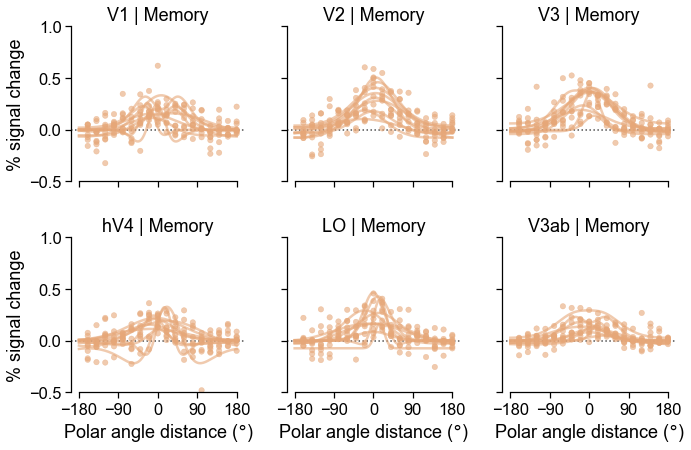

In [9]:
## Plot bold response by angular distance bin 
g = sns.relplot(x='ang_dist_bin', y='beta_adj', col='roi', col_order=rois, 
                hue='subj', palette=[pal_dict['memory']]*len(subjects), 
                kind='scatter', col_wrap=3, s=30, alpha=.6, edgecolor=None, 
                legend=False, height=3.3, aspect=1, 
                data=subj_data.query("task=='memory'"))


# Plot the fit von mises distributions
mem_params = subj_params.query("task=='memory'")
for (r, s) in itertools.product(g.col_names, subjects):
    # von mises fit to data
    ax_i = rois.index(r)
    p = mem_params.query("roi==@r & subj==@s")[['loc', 'kappa1', 'scale1', 'kappa2', 'scale2']].iloc[0]
    yhat = plotutils.diff_vonmises(theta, *p)
    g.axes.flatten()[ax_i].plot(np.rad2deg(theta), yhat, linewidth=2.5, alpha=.6,
                                zorder=z['memory'], c=pal_dict['memory']) 


g.map(plt.axhline, y=0, c=".3", linewidth=1.5, ls=":", zorder=-10)
g.set(xticks=np.arange(-180, 225, 90), ylim=[-.5, 1], yticks=[-.5, 0, .5, 1])
g.set_xlabels('Polar angle distance ($\\degree$)')
g.set_ylabels('% signal change')
g.set_titles(col_template="{col_name} | Memory")

sns.despine(trim=True)
plt.gcf().tight_layout(h_pad=1.5, w_pad=1.5)

### Supplementary Figure 2c

In [10]:
subj_params['roi_x'] = subj_params['roi'].map(dict(zip(rois, np.arange(len(rois)))))
is_per = subj_params['task']=='perception'
is_mem = subj_params['task']=='memory'
subj_params.loc[is_per, 'roi_x'] =  subj_params.loc[is_per, 'roi_x'] - .15 
subj_params.loc[is_mem, 'roi_x'] =  subj_params.loc[is_mem, 'roi_x'] + .15

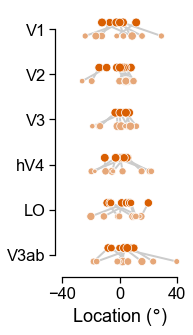

In [11]:
f, ax = plt.subplots(1, 1, figsize=(3, 5))
ax = sns.scatterplot(x='loc_deg', y='roi_x', hue='task', size='r2',
                     palette=pal, hue_order=tasks, linewidth=.75,
                     sizes=(20, 80), legend=False, data=subj_params)

for i, g in subj_params.groupby(['roi', 'subj']):
    plt.plot([g.query("task=='perception'")['loc_deg'].values[0], 
              g.query("task=='memory'")['loc_deg'].values[0]],
             [g.query("task=='perception'")['roi_x'].values[0],
              g.query("task=='memory'")['roi_x'].values[0]],
             zorder=-100, alpha=1, lw=2, c=".8")

ax.set(xlim=[-45, 45], xticks=[-40, 0, 40], ylim=[5.5, -.5], 
       yticks=np.arange(len(rois)), yticklabels=rois);
ax.set_ylabel('')
ax.set_xlabel('Location ($\\degree$)');

sns.despine(trim=True)
f.tight_layout()

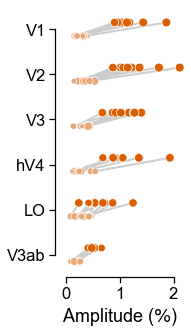

In [12]:
f, ax = plt.subplots(1, 1, figsize=(3, 5))
ax = sns.scatterplot(x='amp', y='roi_x', hue='task', size='r2',
                     palette=pal, hue_order=tasks, linewidth=.75,
                     sizes=(20, 80), legend=False, data=subj_params)

for i, g in subj_params.groupby(['roi', 'subj']):
    plt.plot([g.query("task=='perception'")['amp'].values[0],
              g.query("task=='memory'")['amp'].values[0]],
             [g.query("task=='perception'")['roi_x'].values[0],
              g.query("task=='memory'")['roi_x'].values[0]],
             zorder=-100, alpha=1, lw=2, c=".8")

ax.set(xlim=[-.2, 2.2],  ylim=[5.5, -.5], yticks=np.arange(len(rois)), yticklabels=rois);
ax.set_ylabel('')
ax.set_xlabel('Amplitude ($\%$)');

sns.despine(trim=True)
f.tight_layout()

/var/folders/vf/nf1lflvj6bq862gq9jj2plgw0000gq/T/ipykernel_92360/3567705102.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  f.tight_layout()


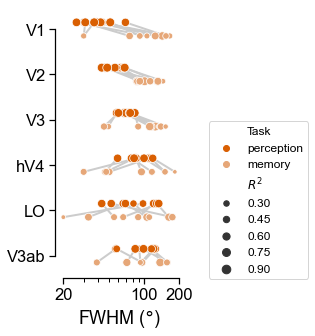

In [13]:
f, ax = plt.subplots(1, 1, figsize=(2.3, 5))
ax = sns.scatterplot(x='fwhm_deg', y='roi_x', hue='task', size='r2',
                     palette=pal, hue_order=tasks, linewidth=.75,
                     sizes=(20, 80), data=subj_params)

for i, g in subj_params.groupby(['roi', 'subj']):
    plt.plot([g.query("task=='perception'")['fwhm_deg'].values[0],
              g.query("task=='memory'")['fwhm_deg'].values[0]],
             [g.query("task=='perception'")['roi_x'].values[0],
              g.query("task=='memory'")['roi_x'].values[0]],
             zorder=-100, alpha=1, lw=2, c=".8")

ax.set_xscale('log')
plt.setp(ax.get_xminorticklabels(), visible=False)
ax.set(xlim=[17, 220], xticks=[20, 100, 200], xticklabels=["20", "100", "200"],
       ylim=[5.5, -.5], yticks=np.arange(len(rois)), yticklabels=rois);
ax.set_ylabel('')
ax.set_xlabel('FWHM ($\\degree$)');

handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Task'
labels[3] = '$R^2$'
ax.legend(handles, labels, bbox_to_anchor=(1.15, .6), fontsize=12)

sns.despine(trim=True)
f.tight_layout()

Number of subjects with memory FWHM > perception FWHM

In [14]:
params_wide = subj_params.pivot_table(index=['subj', 'roi'], columns='task', values='fwhm_deg').reset_index()
params_wide['memory_per_diff'] = params_wide['memory'] - params_wide['perception']
params_wide.query("memory_per_diff>0").groupby('roi')['memory_per_diff'].count()

roi
LO      5
V1      7
V2      9
V3      7
V3ab    5
hV4     5
Name: memory_per_diff, dtype: int64

Average ratio of memory to perception FWHM

In [15]:
params_wide['memory_per_ratio'] = params_wide['memory'] / params_wide['perception']
params_wide.groupby('roi')['memory_per_ratio'].mean()

roi
LO      1.197085
V1      2.548437
V2      2.135392
V3      1.506143
V3ab    1.096208
hV4     1.020202
Name: memory_per_ratio, dtype: float64